In [1]:
%pylab inline
import sklearn as sk
import matplotlib.pyplot as plt
import ipywidgets as widgets
from __future__ import print_function
from ipywidgets import interact_manual
from sklearn.datasets import fetch_olivetti_faces
from random import randint

Populating the interactive namespace from numpy and matplotlib


In [2]:
caras = fetch_olivetti_faces()
print(caras.DESCR)

Modified Olivetti faces dataset.

The original database was available from

    http://www.cl.cam.ac.uk/research/dtg/attarchive/facedatabase.html

The version retrieved here comes in MATLAB format from the personal
web page of Sam Roweis:

    http://www.cs.nyu.edu/~roweis/

There are ten different images of each of 40 distinct subjects. For some
subjects, the images were taken at different times, varying the lighting,
facial expressions (open / closed eyes, smiling / not smiling) and facial
details (glasses / no glasses). All the images were taken against a dark
homogeneous background with the subjects in an upright, frontal position (with
tolerance for some side movement).

The original dataset consisted of 92 x 112, while the Roweis version
consists of 64x64 images.



In [3]:
def mostrarCaras(images, target, top_n):
    # definir el tamaño de la configuracion de la matriz de imagenes
    fig=plt.figure(figsize=(12,12))# Tamaño en pulgadas
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.0)
    
    for i in range(top_n):
        # dibujar las imagenes en una matriz de 15x15
        d = fig.add_subplot(20,20, i+1, xticks=[], yticks=[])
        d.imshow(images[i], cmap=plt.cm.bone)
        
        #etiquetar cada imagen con target de tipo valor
        d.text(0,14,str(target[i]))
        d.text(0,60,str(i))

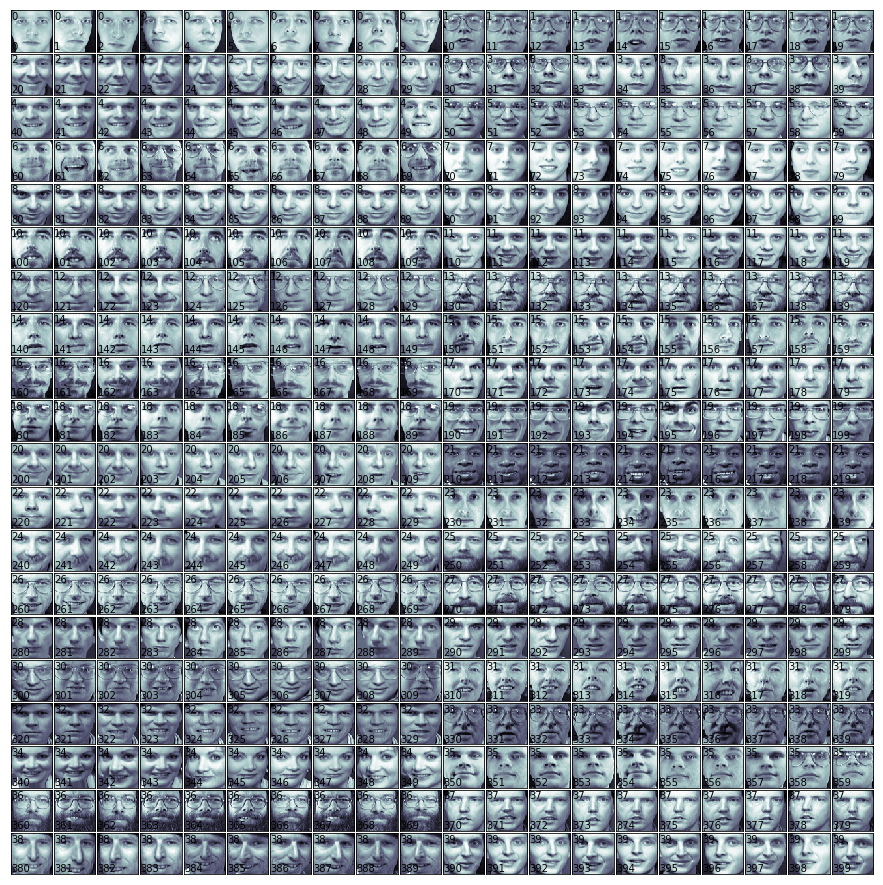

In [4]:
mostrarCaras(caras.images, caras.target, 400)

In [5]:
gafas = []
for i in caras.target:
    if(i == 1 or i == 5 or i == 13 or i == 26 or i == 27 or i == 30 or i == 33 or i == 36):
        gafas.append(1)
    else:
        gafas.append(0)

In [6]:
for i in range(0,400):
    if(i == 30 or i == 31 or i == 32 or i == 37 or i == 38 or i == 63 or i == 64 or i == 69 or i == 120 or i == 121 or i == 124 or i == 125 or i == 126 or i == 127 or i == 128 or i == 129 or i == 160 or i == 161 or i == 164 or i == 165 or i == 166 or i == 167 or i == 168 or i == 169 or i == 180 or i == 181 or i == 182 or i == 185 or i == 189 or i == 190 or i == 191 or i == 192 or i == 194 or i == 196 or i == 197 or i == 198 or i == 199):
        gafas[i] = 1

In [7]:
from sklearn.decomposition import RandomizedPCA
pca = RandomizedPCA(n_components=2, random_state=1999)
proj = pca.fit_transform(caras.data)

/srv/conda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:52: DeprecationWarning: Class RandomizedPCA is deprecated; RandomizedPCA was deprecated in 0.18 and will be removed in 0.20. Use PCA(svd_solver='randomized') instead. The new implementation DOES NOT store whiten ``components_``. Apply transform to get them.
  warnings.warn(msg, category=DeprecationWarning)


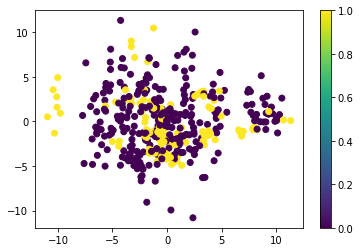

In [8]:
plt.scatter(proj[:, 0], proj[:, 1], c=gafas)
plt.colorbar()

In [9]:
from sklearn.manifold import Isomap
iso = Isomap(n_neighbors=5, n_components=2)
proj = iso.fit_transform(caras.data)

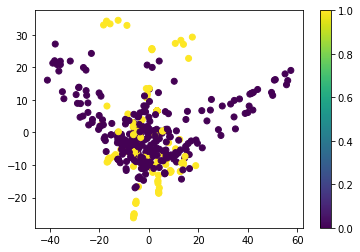

In [10]:
plt.scatter(proj[:, 0], proj[:, 1], c=gafas)
plt.colorbar()

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split

/srv/conda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [12]:
#Dividir nuestros datos en conjuntos de entrenamiento y validacion
X_train, x_test, y_train, y_test = train_test_split(caras.data, gafas, random_state=0)

#Entrenar el modelo
lm = LogisticRegression()
lm.fit(X_train, y_train)

# Utilizar el modelo para predecir las etiquetas de los datos de pruea
predicted = lm.predict(x_test)
expected = y_test #funcion objetivo

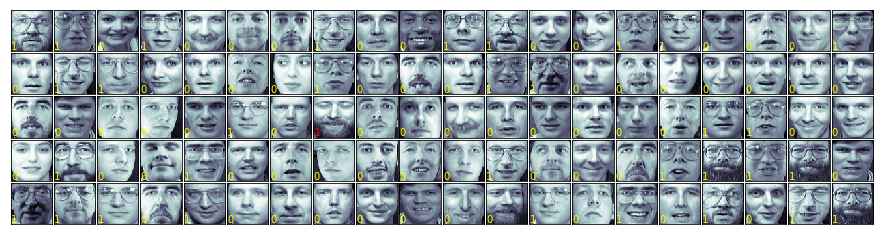

In [13]:
fig = plt.figure(figsize=(12,12))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.0)
for i in range(len(predicted)):
    d = fig.add_subplot(20, 20, i + 1, xticks=[], yticks=[])
    d.imshow(x_test.reshape(-1,64, 64)[i], cmap=plt.cm.bone)
    # etiquetada de cada imagen con target de tipo valor
    #Etiqueta la imagen con el valor objetivo
    if predicted[i] == expected[i]:
        d.text(0, 60, str(predicted[i]), color='yellow')
    else:
        d.text(0, 60, str(predicted[i]), color= 'red')

In [14]:
def rand():
    num = randint(0,100)
    
    fig = plt.figure(figsize=(100,100))
    d = fig.add_subplot(20, 20, 1, xticks=[], yticks=[])
    
    d.imshow(x_test.reshape(-1,64, 64)[num], cmap=plt.cm.bone)
        
    if predicted[num] == 1:
        etiqueta = 'Tiene Gafas'
    else:
        etiqueta = 'No Tiene Gafas'
        
    if predicted[num] == expected[num]:
        d.text(23, 5, etiqueta, style='italic',
        bbox={'facecolor':'green', 'alpha':0.5, 'pad':10})
    else:
        d.text(23, 5, etiqueta, style='italic',
        bbox={'facecolor':'red', 'alpha':0.5, 'pad':10})

In [15]:
interact_manual(rand)

interactive(children=(Button(description='Run Interact', style=ButtonStyle()), Output()), _dom_classes=('widge…

<function __main__.rand>

In [16]:
matches = (predicted == expected)
print(matches.sum())
print(len(matches))

99
100


In [17]:
matches.sum()/ float(len(matches))*100

99.0